In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df_iris['target'] = iris.target
print(df_iris.head())
data = df_iris.iloc[:,:-1].to_numpy()
target = df_iris.iloc[:,-1].to_numpy()
print(data.shape,target.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
(150, 4) (150,)


In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(data,target,stratify=target,random_state=42)
print(train_input.shape,test_input.shape)

(112, 4) (38, 4)


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(train_input)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(km.n_iter_)
print(km.labels_)
print(train_target)
print(np.unique(km.labels_,return_counts=True))
print(np.unique(train_target,return_counts=True))
print(km.cluster_centers_) #각 특성의 평균

4
[2 2 0 0 0 2 1 0 1 0 1 2 0 1 1 0 2 1 1 0 0 0 1 0 2 1 2 0 2 1 1 0 1 0 1 1 0
 1 0 1 1 0 0 0 1 2 0 1 2 1 2 2 1 0 0 2 0 0 1 0 0 2 0 2 1 0 1 2 0 2 0 2 2 1
 2 0 1 2 1 2 0 0 1 0 2 1 1 2 0 0 2 1 2 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1]
[2 2 1 1 1 2 0 2 0 2 0 2 1 0 0 1 2 0 0 1 1 1 0 1 2 0 2 1 2 0 0 1 0 2 0 0 1
 0 1 0 0 1 2 2 0 2 1 0 2 0 2 2 0 1 2 2 1 1 0 1 1 2 1 2 0 1 0 2 1 2 1 2 2 0
 2 1 0 2 0 2 1 1 0 2 2 0 0 2 2 1 2 0 2 1 2 2 0 1 1 1 1 1 0 2 1 1 0 0 0 0 1
 0]
(array([0, 1, 2], dtype=int32), array([48, 38, 26]))
(array([0, 1, 2]), array([38, 37, 37]))
[[5.99166667 2.72916667 4.43541667 1.4375    ]
 [4.99473684 3.45       1.48157895 0.24736842]
 [6.95769231 3.12692308 5.86153846 2.12692308]]


In [ ]:
print(km.predict(test_input))
print(test_target)

[1 0 0 0 1 0 0 2 2 2 0 2 0 0 1 1 1 0 1 0 2 0 0 0 2 0 1 0 1 0 2 2 1 1 1 1 2
 0]
[0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]


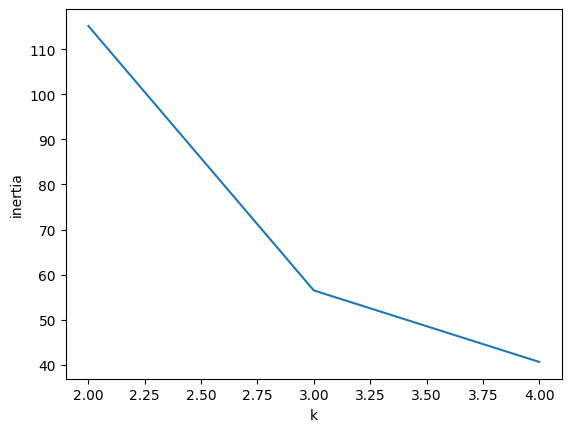

In [ ]:
#군집의 개수를 모를때 -> 이니셔를 바꿔가며 확인
inertia = []
for k in range(2,5):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(train_input)
  inertia.append(km.inertia_)
plt.plot(range(2,5),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

/usr/local/lib/python3.12/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.12/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4, random_state=42),
                 k=(2, 5))

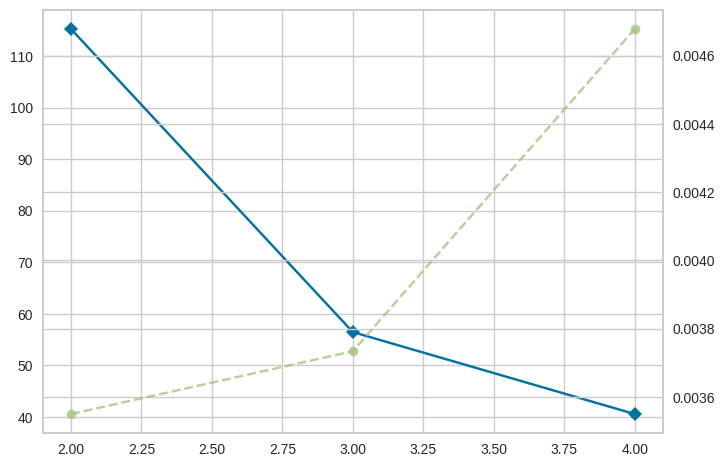

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km,k=(2,5))
visualizer.fit(train_input)

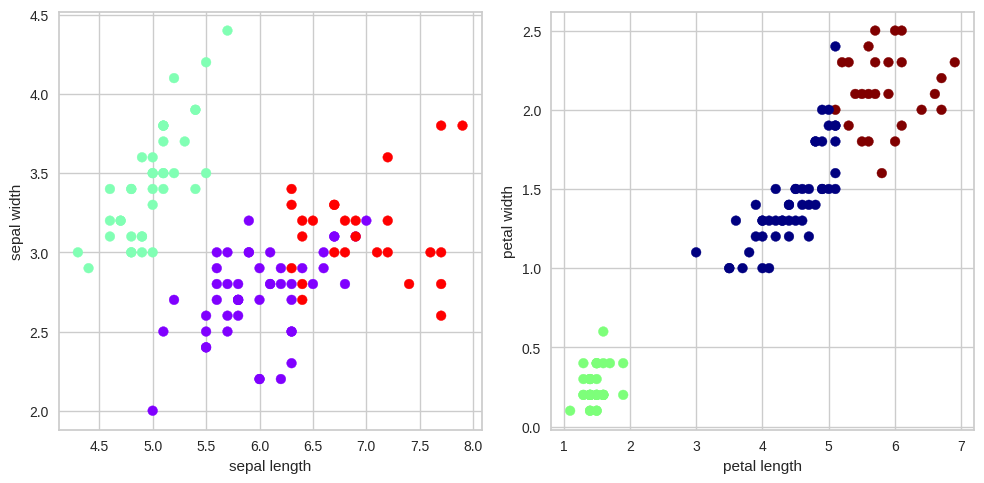

In [ ]:
#군집별 스캐터
km = KMeans(n_clusters=3,random_state=42)
km.fit(train_input)
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(train_input[:,0],train_input[:,1],c=km.labels_, cmap='rainbow')
axs[1].scatter(train_input[:,2],train_input[:,3],c=km.labels_,cmap='jet')
axs[0].set_xlabel('sepal length')
axs[0].set_ylabel('sepal width')
axs[1].set_xlabel('petal length')
axs[1].set_ylabel('petal width')
fig.tight_layout()
plt.show()
